In [ ]:
# pip install biopandas

In [ ]:
# from biopandas.pdb import PandasPdb
# ppdb = PandasPdb().fetch_pdb('5keh')
# my_prtn = ppdb.read_pdb('5keh.pdb')

In [ ]:
# my_prtn

In [ ]:
# print(ppdb.code)
# print(ppdb.header)

5keh
    TOXIN                                   09-JUN-16   5KEH


In [ ]:
# import pandas as pd
# #pd.set_option('display.max_rows', None)
# #pd.set_option('display.max_columns', None)
# #ppdb.df['ATOM'].head(10)
# ppdb.df

In [ ]:
import regex as re

In [ ]:
file = open('prtn.txt', 'w')
with open('5keh.cif') as f:
  for line in f:
    if re.search('^ATOM', line):
      file.write(line)
file.close()

In [ ]:
import pandas as pd

In [ ]:
omk_keh = pd.read_csv('prtn.txt', sep='\s+', header=None)

In [ ]:
omk_keh

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,ATOM,1,N,N,.,ASN,A,1,1,?,...,-11.789,7.389,1.0,43.22,?,30,ASN,A,N,1
1,ATOM,2,C,CA,.,ASN,A,1,1,?,...,-11.455,6.106,1.0,39.48,?,30,ASN,A,CA,1
2,ATOM,3,C,C,.,ASN,A,1,1,?,...,-11.196,6.314,1.0,26.69,?,30,ASN,A,C,1
3,ATOM,4,O,O,.,ASN,A,1,1,?,...,-11.032,5.345,1.0,27.17,?,30,ASN,A,O,1
4,ATOM,5,C,CB,.,ASN,A,1,1,?,...,-12.582,5.089,1.0,44.77,?,30,ASN,A,CB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,ATOM,1870,N,N,.,HIS,A,1,242,?,...,-23.019,17.990,1.0,30.41,?,271,HIS,A,N,1
1870,ATOM,1871,C,CA,.,HIS,A,1,242,?,...,-23.587,18.683,1.0,37.47,?,271,HIS,A,CA,1
1871,ATOM,1872,C,C,.,HIS,A,1,242,?,...,-24.339,17.704,1.0,50.84,?,271,HIS,A,C,1
1872,ATOM,1873,O,O,.,HIS,A,1,242,?,...,-23.771,16.733,1.0,54.83,?,271,HIS,A,O,1


In [ ]:
#extracting main chain atoms
main_NCaC = omk_keh[omk_keh[3].isin(['N','C','CA'])]

#extracting only one coordinate set
main_A = main_NCaC[main_NCaC[4].isin(['A','.'])]

#removing extra columns
mainCol_NCaC = main_A.drop([0,2,6,7,8,9,13,14,15,16,17,18,19,20], axis=1, index=None)
#main_NCaC = ppdb.df['ATOM'][ppdb.df['ATOM']['atom_name'].isin(['C','N','CA'])]

#extracting only one coordinate set
#main_A = main_NCaC[main_NCaC['alt_loc'].isin(['A',''])]
#main_A

#remove alt_loc column
#main_A = main_A.drop(labels='alt_loc',axis=1)
mainCol_NCaC

,1,3,4,5,10,11,12
0,1,N,.,ASN,21.885,-11.789,7.389
1,2,CA,.,ASN,21.312,-11.455,6.106
2,3,C,.,ASN,19.828,-11.196,6.314
5,6,N,.,GLY,19.418,-11.153,7.592
6,7,CA,.,GLY,18.007,-10.911,7.902
...,...,...,...,...,...,...,...
1860,1861,CA,.,HIS,-11.610,-23.166,17.141
1861,1862,C,.,HIS,-12.793,-23.779,17.872
1869,1870,N,.,HIS,-13.883,-23.019,17.990
1870,1871,CA,.,HIS,-15.061,-23.587,18.683


In [ ]:
#extracting important columns
#mainCol_NCaC = main_A[['atom_number','atom_name','residue_name','residue_number','x_coord','y_coord','z_coord']]
#mainCol_NCaC

__Dihedral angle of 4 atoms__

In [ ]:
import numpy as np
import math, sympy
from sympy import atan2

def dihedral_angle(X1,X2,X3,X4):
    #3 vectors from 4 points
    V1 = X1-X2
    V2 = X2-X3
    V3 = X3-X4
    
    #normal vectors from cross product of 3 vectors above
    V4 = np.cross(V1,V2)
    V5 = np.cross(V2,V3)
    
    #vectors for orthogonal plane
    nr_vct_cross = np.cross(V4,V2)
    nr_vct_dot = np.dot(V4,V5)
    
    x = nr_vct_dot
    y = np.dot(nr_vct_cross,V5)/np.linalg.norm(V2)
    
    #final dihedral angle calculation
    deg = sympy.atan2(y,x)
    di_an = math.degrees(deg)
    
    return di_an    

# Reference:
# https://mebinfotalk.blogspot.com/2013/06/how-to-calculate-dihedral-angle-using.html
# https://math.stackexchange.com/questions/47059/how-do-i-calculate-a-dihedral-angle-given-cartesian-coordinates        

In [ ]:
import numpy as np
X1 = np.array([0, 0, 1])
X2 = np.array([0, 0, 0])
X3 = np.array([1, 0, 0])
X4 = np.array([1, 1, 1])

dihedral_angle(X1,X2,X3,X4)

-45.0

In [ ]:
import numpy as np
X1 = np.array([0, 0, 1])
X2 = np.array([0, 0, 0])
X3 = np.array([1, 0, 0])
X4 = np.array([1, -1, 1])

dihedral_angle(X1,X2,X3,X4)

45.0

In [ ]:
mainCol_NCaC

,1,3,4,5,10,11,12
0,1,N,.,ASN,21.885,-11.789,7.389
1,2,CA,.,ASN,21.312,-11.455,6.106
2,3,C,.,ASN,19.828,-11.196,6.314
5,6,N,.,GLY,19.418,-11.153,7.592
6,7,CA,.,GLY,18.007,-10.911,7.902
...,...,...,...,...,...,...,...
1860,1861,CA,.,HIS,-11.610,-23.166,17.141
1861,1862,C,.,HIS,-12.793,-23.779,17.872
1869,1870,N,.,HIS,-13.883,-23.019,17.990
1870,1871,CA,.,HIS,-15.061,-23.587,18.683


In [ ]:
mainCol_NCaC.dtypes

1       int64
3      object
4      object
5      object
10    float64
11    float64
12    float64
dtype: object

In [ ]:
# #combining residue_name and atom_number to create a unique id
# uniq_id = mainCol_NCaC[mainCol_NCaC(1)] + mainCol_NCaC[mainCol_NCaC(5)]
# #uniq_id = mainCol_NCaC[mainCol_NCaC(1)] + mainCol_NCaC[mainCol_NCaC(5)].map(str)
# mainCol_NCaC[(13)] = uniq_id

# #removing columns combined
# #mainCol_NCaC = mainCol_NCaC.drop(columns=['atom_number','residue_name','residue_number'])
# mainCol_NCaC

In [ ]:
mainCol_NCaC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 1871
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       726 non-null    int64  
 1   3       726 non-null    object 
 2   4       726 non-null    object 
 3   5       726 non-null    object 
 4   10      726 non-null    float64
 5   11      726 non-null    float64
 6   12      726 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 45.4+ KB


In [ ]:
mainCol_NCaC

,1,3,4,5,10,11,12
0,1,N,.,ASN,21.885,-11.789,7.389
1,2,CA,.,ASN,21.312,-11.455,6.106
2,3,C,.,ASN,19.828,-11.196,6.314
5,6,N,.,GLY,19.418,-11.153,7.592
6,7,CA,.,GLY,18.007,-10.911,7.902
...,...,...,...,...,...,...,...
1860,1861,CA,.,HIS,-11.610,-23.166,17.141
1861,1862,C,.,HIS,-12.793,-23.779,17.872
1869,1870,N,.,HIS,-13.883,-23.019,17.990
1870,1871,CA,.,HIS,-15.061,-23.587,18.683


In [ ]:
mainCol_NCaC.iloc[2,4:7]

10    19.828
11   -11.196
12     6.314
Name: 2, dtype: object

__Phi and Psi angles__

In [ ]:
def psi(df):
    psi_list = []
        
    a = 0
    for i in range(len(mainCol_NCaC)):
        if np.all(np.array(mainCol_NCaC.iloc[a:a+4, 1]) == np.array(['N','CA','C','N'])):
            X1 = np.array(mainCol_NCaC.iloc[a, 4:7], dtype = "float64")
            X2 = np.array(mainCol_NCaC.iloc[a+1, 4:7], dtype = "float64")
            X3 = np.array(mainCol_NCaC.iloc[a+2, 4:7], dtype = "float64")
            X4 = np.array(mainCol_NCaC.iloc[a+3, 4:7], dtype = "float64")
      
            psi_list.append(dihedral_angle(X1,X2,X3,X4))
            a = a+3
        else:
            psi_list.append('NA')
        
    return psi_list  

In [ ]:
def phi(df):
    phi_list = []
        
    a = 2
    for i in range(len(mainCol_NCaC)):
        if np.all(np.array(mainCol_NCaC.iloc[a:a+4, 1]) == np.array(['C','N','CA','C'])):
            X1 = np.array(mainCol_NCaC.iloc[a, 4:7], dtype = "float64")
            X2 = np.array(mainCol_NCaC.iloc[a+1, 4:7], dtype = "float64")
            X3 = np.array(mainCol_NCaC.iloc[a+2, 4:7], dtype = "float64")
            X4 = np.array(mainCol_NCaC.iloc[a+3, 4:7], dtype = "float64")
      
            phi_list.append(dihedral_angle(X1,X2,X3,X4))
            a = a+3
        else:
            phi_list.append('NA')
            
    return phi_list 

In [ ]:
keh_psi = psi(mainCol_NCaC)
keh_phi = phi(mainCol_NCaC)

# # extracting unique ids
# id_list = mainCol_NCaC['Unique_ID'].tolist()

# def unique(list1):
#     unique_list = []
    
#     for x in list1:
#          if x not in unique_list:
#                 unique_list.append(x)
#     return unique_list

# unid_list = unique(id_list)

#removing NAs
import math
import numpy as np
psi_noNA = [x for x in keh_psi if x != 'NA']
phi_noNA = [x for x in keh_phi if x != 'NA']

# #Dataframe with phi and psi angles
# import pandas as pd
# dict_angles = pd.DataFrame()
# dict_angles['psi_angles']=psi_noNA
# dict_angles['phi_angles']=phi_noNA

# ID_uniq = pd.DataFrame()
# ID_uniq['Unique_ID']=unid_list

# final_table = pd.concat([ID_uniq,dict_angles], ignore_index=True, axis=1)

# final_table

__Ramachandran Plot__

In [ ]:
import matplotlib.pyplot as plt

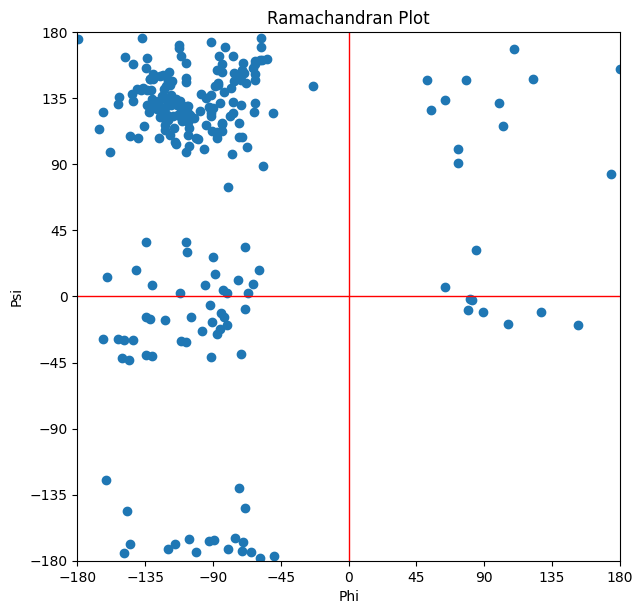

In [ ]:
plt.figure(figsize=[7,7],dpi=100)
axes = plt.subplot()
axes.set_title('Ramachandran Plot')
axes.set_xlabel('Phi')
axes.set_ylabel('Psi')
axes.set_xlim(-180,180)
axes.set_ylim(-180,180)
axes.set_xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
axes.set_yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.axhline(y=0, color='red', lw=1)
plt.axvline(x=0, color='red', lw=1)
axes.scatter(phi_noNA,psi_noNA)
plt.savefig('Ramachandran Plot')
plt.show()

__Secondary structures present in the protein '5KEH' include a majority of beta sheets followed by right-handed alpha helix and a few randomly distributed lef-handed alpha helix__